In [51]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [8]:
seed = 42
np.random.seed(seed)

In [11]:
data_path = '../../data/interim/texts.csv'
df = pd.read_csv(data_path, index_col=0)
df

,title,label
0,U.S. Justice Department Investigating Binance ...,negative
1,"Voyager Digital Plans to Liquidate Assets, Win...",negative
2,Aragon Fires Back at Activist Investors in Ear...,negative
3,Pepecoin’s Bewildering Rise Turned a Pittance ...,positive
4,NFT Lending Platform Blend Sparks Concerns Ove...,negative
...,...,...
2232,Bitcoin may only need 4 weeks to hit $30K as k...,positive
2233,How to create an IT strategy for your business,neutral
2234,"FSB, IMF and BIS papers to set global crypto f...",neutral
2235,Top 7 cybersecurity jobs in high demand,neutral


In [15]:
X = df.title.values.flatten()
y = df.label.values.flatten()
train_texts, val_texts, train_labels, val_labels = train_test_split(X, y, test_size=0.2, shuffle=True)

print(f'Train set size: {train_texts.shape[0]}')
print(f'Test set size: {val_texts.shape[0]}')

Train set size: 1789
Test set size: 448


In [53]:
ls ../../reports/figures

model_eval.png


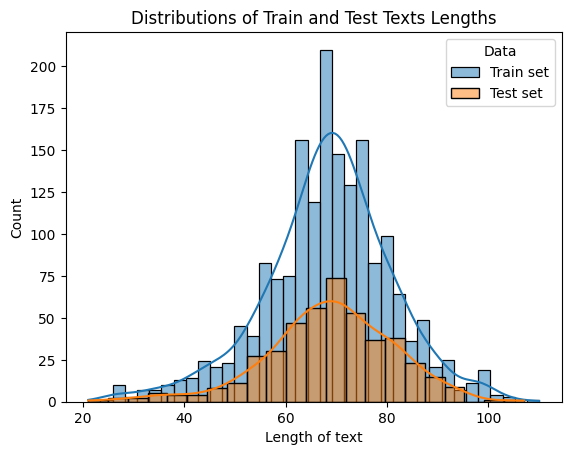

In [54]:
train_lengths = [len(text) for text in train_texts]
val_lengths = [len(text) for text in val_texts]

# plot the distributions using seaborn hist
sns.histplot(train_lengths, kde=True, label='Train set')
sns.histplot(val_lengths, kde=True, label='Test set')
plt.legend(title='Data')
plt.xlabel('Length of text')
plt.ylabel('Count')
plt.title('Distributions of Train and Test Texts Lengths')
plt.savefig('../../reports/figures/text_lengths.png')
plt.show()

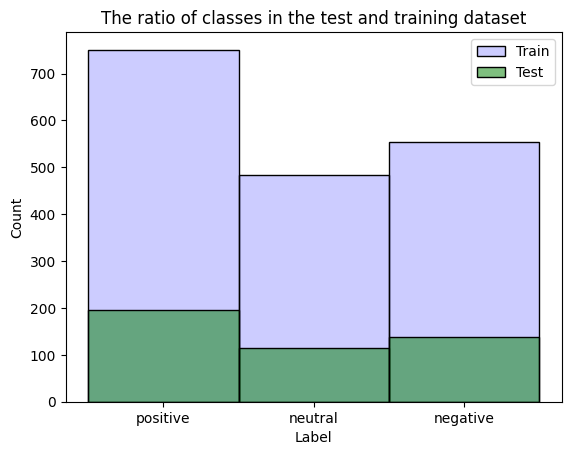

In [55]:
sns.histplot(train_labels, color='blue', alpha=0.2, label='Train')
sns.histplot(val_labels, color='green', alpha=0.5, label='Test')
plt.legend()
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('The ratio of classes in the test and training dataset')
plt.savefig('../../reports/figures/classes_ratio.png')
plt.show()

# Sentiment_net prediction on the test set results

In [20]:
prediction_path = '../../data/eval_data/output/prediction.csv'
df = pd.read_csv(prediction_path, index_col=0)
df

,text,predict,target
0,united states cbdc would ‘ crowd out ’ crypto ...,negative,negative
1,community wants arbitrum foundation to return ...,negative,negative
2,class action lawyers claim youtuber ‘ bitboy c...,negative,negative
3,bitcoin ’ s least volatile month ever? btc pri...,neutral,neutral
4,biden vows to hold accountable those responsib...,negative,negative
...,...,...,...
443,ftx presentation shows ‘ massive shortfall ’ i...,negative,negative
444,state governor and us presidential hopeful cal...,negative,negative
445,btc price heading under $ 30k? 5 things to kno...,neutral,negative
446,how can ai be used to improve credit scoring?,neutral,neutral


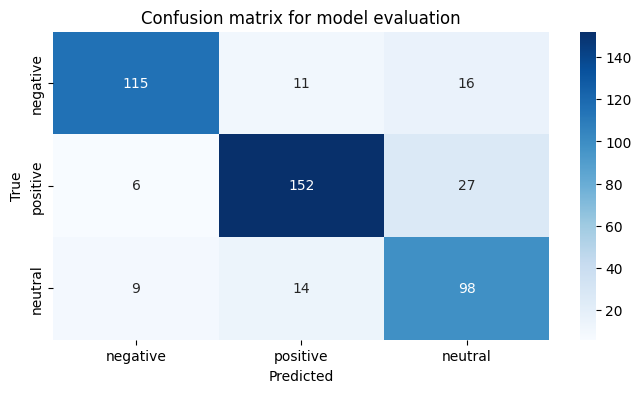

In [56]:
class_names = ['negative', 'positive', 'neutral']
cm = confusion_matrix(df.target.values, df.predict.values, labels=class_names)

fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f', xticklabels=class_names, yticklabels=class_names, ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix for model evaluation')
plt.savefig('../../reports/figures/cm_test.png')
plt.show()

In [40]:
for sent_class in ['positive', 'negative', 'neutral']:

    print(f'Example of TP for {sent_class} class:')
    print('-'*100)
    condition = f'predict == "{sent_class}" & target == "{sent_class}"'
    random_predictions = df.query(condition).sample(5)
    for title in random_predictions.text.values.flatten():
        print(title)
    print(' ')


Example of TP for positive class:
----------------------------------------------------------------------------------------------------
over 80 crypto firms eyeing presence in hong kong : financial secretary
uk forms bitcoin policy org to boost btc education and adoption
total arbitrum accounts surpass 5m after airdrop hype : report
lark davis on fighting social media storms, and why he ’ s an eth bull : hall of flame
17 ways to better explain blockchain projects to potential investors
 
Example of TP for negative class:
----------------------------------------------------------------------------------------------------
elon musk and tech execs call for pause on ai development
nft investor accidentally burns $ 135k cryptopunk trying to borrow money
lack of stablecoin regulation could push issuers out of us — austin campbell
us gdp misses goal as bitcoin price seeks to erase ‘ ultra nasty ’ 7 % dip
okx seizes 2m usdt linked to market manipulation
 
Example of TP for neutral class:
------